<span style="font-family:Cursive;font-size:75px;color:#4B0082;font-style:italic;font-weight:normal;">
Exploring the Iris flower dataset</span>

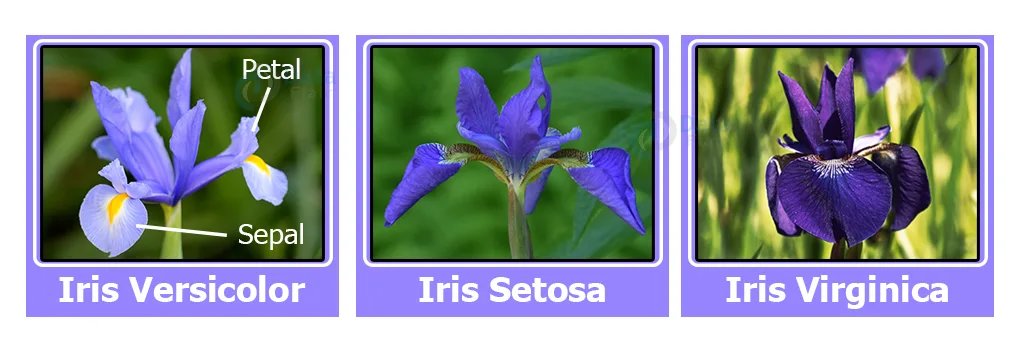

The Iris flower dataset is a classic dataset in the field of machine learning and statistical analysis. It consists of 150 observations of iris flowers, including the sepal and petal length and width for each flower, as well as the species of the flower. The dataset was introduced by British statistician and biologist Ronald Fisher in his 1936 paper, "The use of multiple measurements in taxonomic problems."

In this notebook, we will explore the Iris dataset and use various statistical and machine learning techniques to better understand the relationships between the different features and the species of the flowers. We will also use the dataset to build and evaluate a classifier that can predict the species of an iris flower based on its measurements.

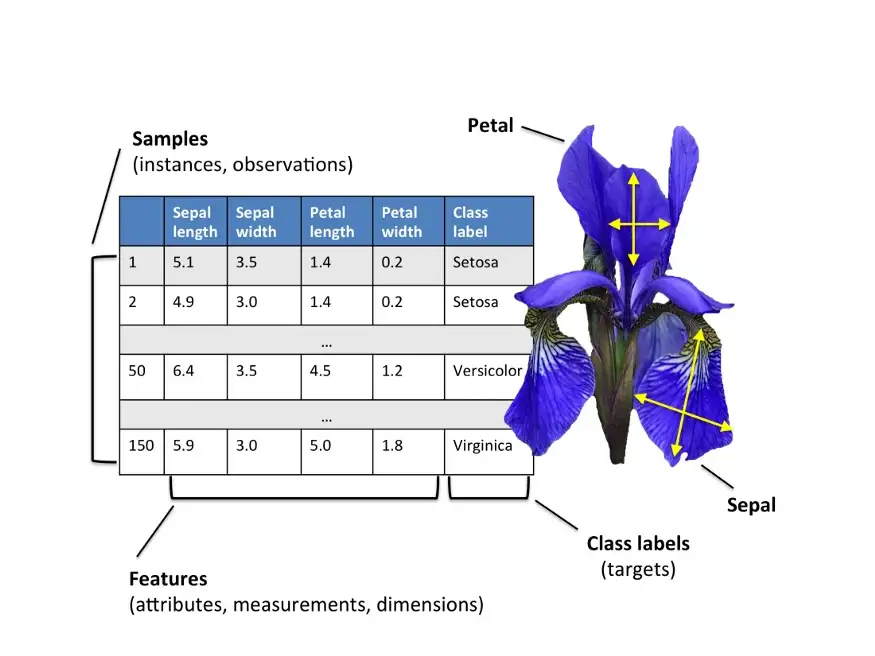

**The variables are:**

* sepal_length: Sepal length, in centimeters, used as input.
* sepal_width: Sepal width, in centimeters, used as input.
* petal_length: Petal length, in centimeters, used as input.
* petal_width: Petal width, in centimeters, used as input.
* class: Iris Setosa, Versicolor, or Virginica, used as the target.

Let's start by importing the necessary libraries and loading the dataset.

# Table of Contents

1. [Import the necessary libraries](#1)
2. [Load the data](#2)
3. [Preprocess the data](#3)
4. [Data Visualization](#4)
5. [Split the data into training and test sets](#5)
6. [Training the model](#6)

<a id="1"></a> <br>
# 1. Import the necessary libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import pandas_profiling
import tensorflow as tf
import sklearn.metrics as metrics

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# Import Warnings
import warnings
warnings.simplefilter(action="ignore")

# Setting Configurations:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# for data splitting, transforming and model training
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


<a id="1"></a> <br>
# 2. Load the data
**Load the Iris dataset into a Pandas DataFrame.**

In [2]:
# Load the Iris dataset into a Pandas DataFrame
data = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100,3.500,1.400,0.200,Iris-setosa
1,2,4.900,3.000,1.400,0.200,Iris-setosa
2,3,4.700,3.200,1.300,0.200,Iris-setosa
3,4,4.600,3.100,1.500,0.200,Iris-setosa
4,5,5.000,3.600,1.400,0.200,Iris-setosa


In [4]:
data.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary

In [5]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

SepalLengthCm:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
SepalWidthCm:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
PetalLengthCm:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
PetalWidthCm:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


<a id="1"></a> <br>
# 3. Preprocess the data

In [7]:
# Checking for missing values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
duplicates = data[data.duplicated()]
print("Number of duplicates:", len(duplicates))

Number of duplicates: 3


In [9]:
# Drop duplicates
data = data.drop_duplicates()

In [10]:
# Checking for outliers
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000,147.000,147.000,147.000
mean,5.856,3.056,3.780,1.209
std,0.829,0.437,1.759,0.758
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.400,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [11]:
# Checking for the data types
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [12]:
# Checking for the shape of the dataset
data.shape

(147, 5)

In [13]:
# Checking for the correlation
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000,-0.109,0.871,0.817
SepalWidthCm,-0.109,1.000,-0.421,-0.356
PetalLengthCm,0.871,-0.421,1.000,0.962
PetalWidthCm,0.817,-0.356,0.962,1.000


In [14]:
# Calculate the skewness for all columns
data.skew()

SepalLengthCm    0.293
SepalWidthCm     0.324
PetalLengthCm   -0.294
PetalWidthCm    -0.113
dtype: float64

In [15]:
# Checking for the unique values
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [16]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'], dtype='object')

In [17]:
# Checking for the value counts
data["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

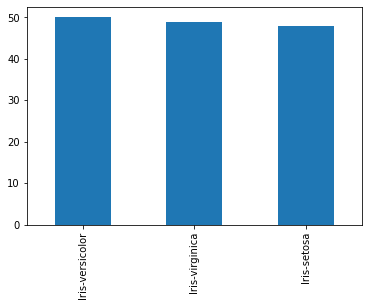

In [18]:
# Checking for the value counts
data['Species'].value_counts().plot(kind='bar')
plt.show()

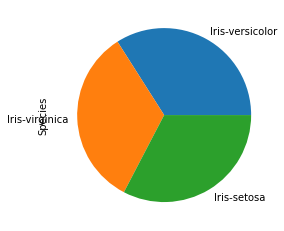

In [19]:
# Checking for the value counts
data['Species'].value_counts().plot(kind='pie')
plt.show()

In [20]:
data.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'], dtype='object')

In [21]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a id="1"></a> <br>
# 4. Data visualization

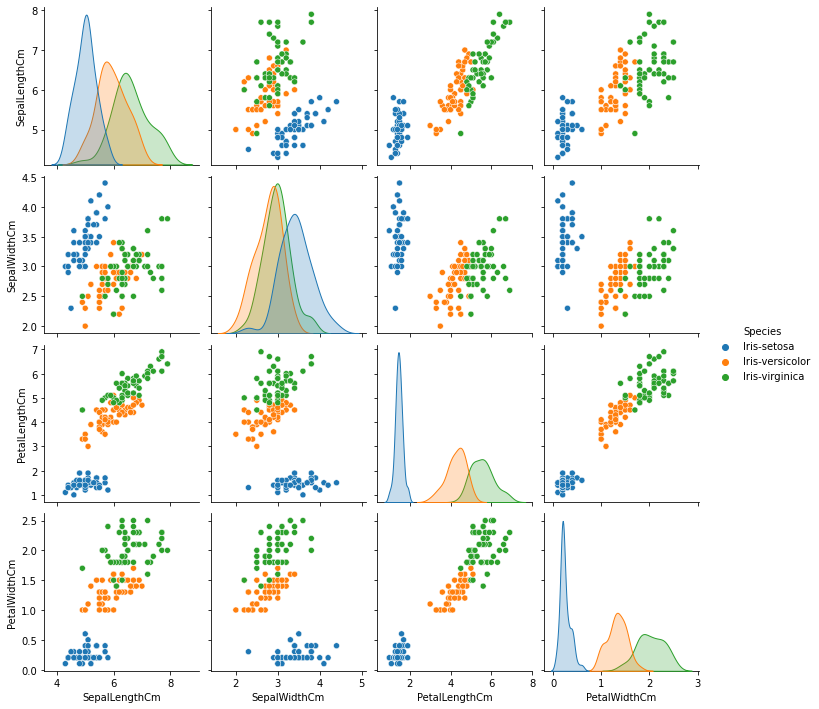

In [22]:
# Visualize the whole dataset

sns.pairplot(data,hue="Species")
plt.show()

> There is a high correlation between the petal length and width columns in the Iris dataset. The Setosa species has both low petal length and width, while the Versicolor species has both average petal length and width. The Virginica species, on the other hand, has both high petal length and width. In terms of sepal dimensions, the Setosa species has high sepal width and low sepal length, the Versicolor species has average values for both sepal dimensions, and the Virginica species has small sepal width but large sepal length.

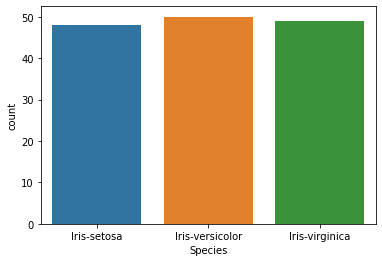

In [23]:
# Plotting the countplot
sns.countplot(x='Species', data=data)
plt.show()

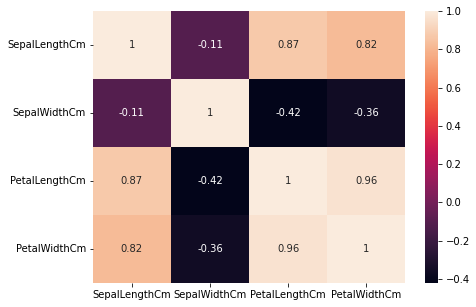

In [24]:
plt.figure(figsize=(7,5))
# Plotting the heatmap
sns.heatmap(data.corr(), annot=True)
plt.show()

> Sepal Length and Sepal Width features are slightly correlated with each other

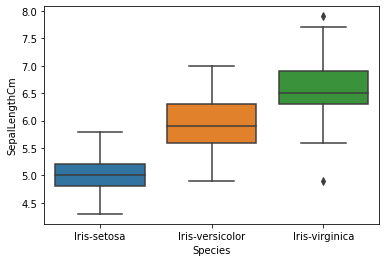

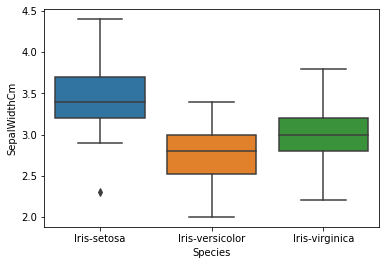

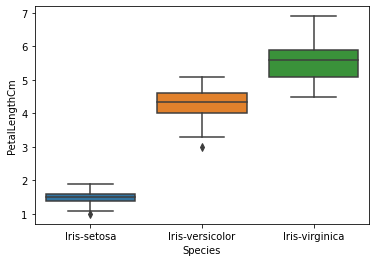

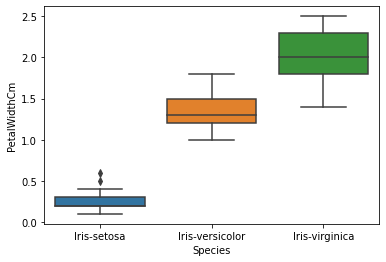

In [25]:
# Plotting the boxplot
sns.boxplot(x='Species', y='SepalLengthCm', data=data)
plt.show()

sns.boxplot(x='Species', y='SepalWidthCm', data=data)
plt.show()

sns.boxplot(x='Species', y='PetalLengthCm', data=data)
plt.show()

sns.boxplot(x='Species', y='PetalWidthCm', data=data)
plt.show()

> The Setosa species has smaller and less distributed features compared to the other two species. The Versicolor species is distributed in an average manner and has average-sized features. The Virginica species, on the other hand, is highly distributed with a large number of values and features. The mean and median values of various features (such as sepal length and width, and petal length and width) are clearly shown by each plot for each species. This suggests that the distribution of these features varies significantly between the three species.

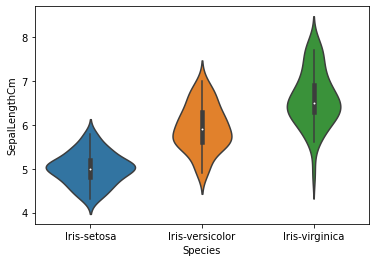

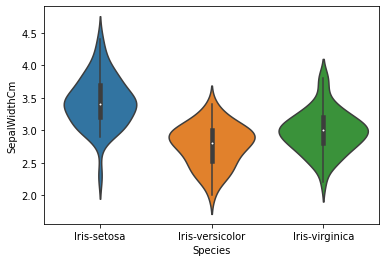

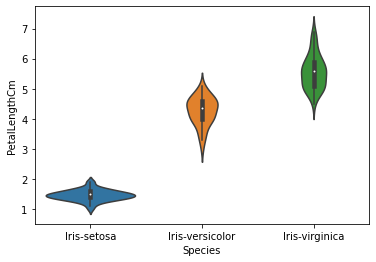

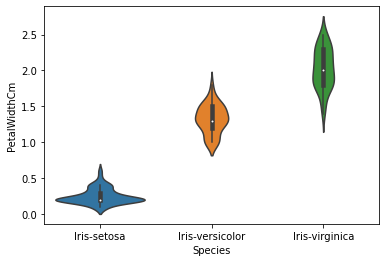

In [26]:
# Plotting the violinplot
sns.violinplot(x='Species', y='SepalLengthCm', data=data)
plt.show()

sns.violinplot(x='Species', y='SepalWidthCm', data=data)
plt.show()

sns.violinplot(x='Species', y='PetalLengthCm', data=data)
plt.show()

sns.violinplot(x='Species', y='PetalWidthCm', data=data)
plt.show()

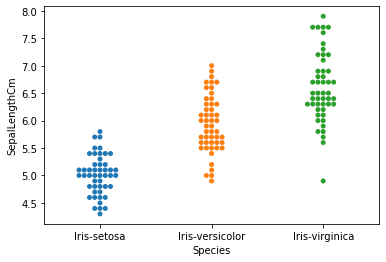

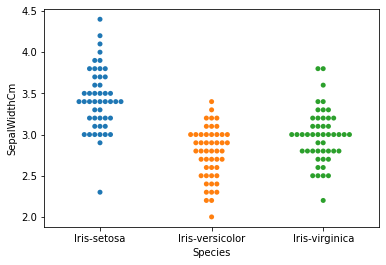

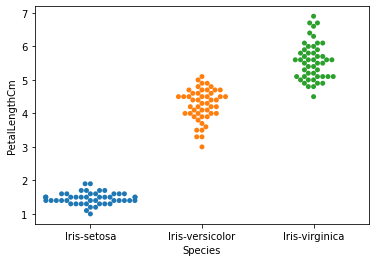

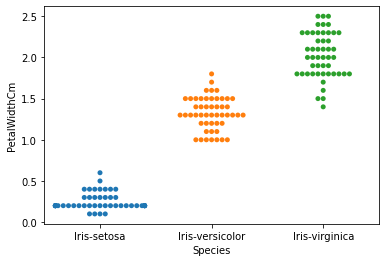

In [27]:
# Plotting the swarmplot
sns.swarmplot(x='Species', y='SepalLengthCm', data=data)
plt.show()
sns.swarmplot(x='Species', y='SepalWidthCm', data=data)
plt.show()
sns.swarmplot(x='Species', y='PetalLengthCm', data=data)
plt.show()
sns.swarmplot(x='Species', y='PetalWidthCm', data=data)
plt.show()

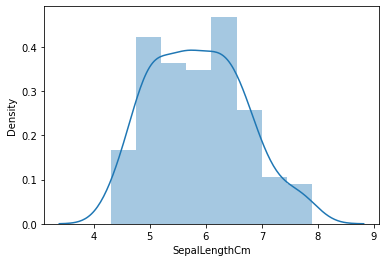

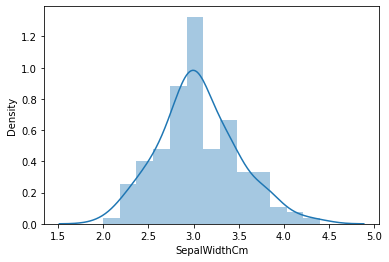

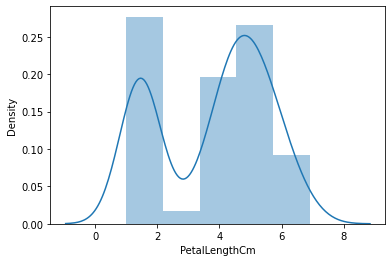

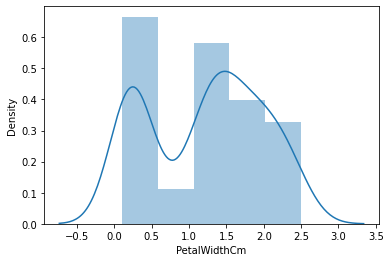

In [28]:
# Plotting the distplot
sns.distplot(data['SepalLengthCm'])
plt.show()

sns.distplot(data['SepalWidthCm'])
plt.show()

sns.distplot(data['PetalLengthCm'])
plt.show()

sns.distplot(data['PetalWidthCm'])
plt.show()

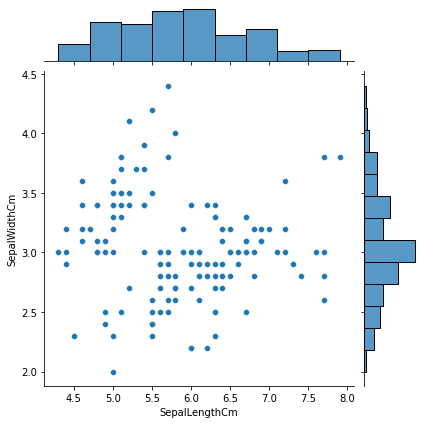

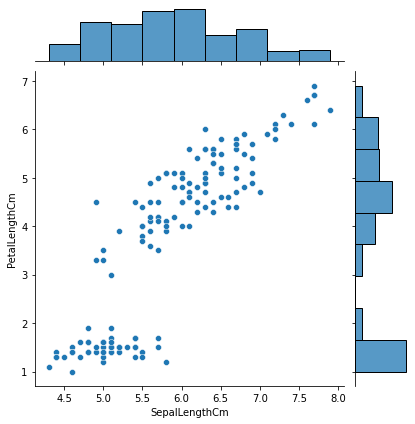

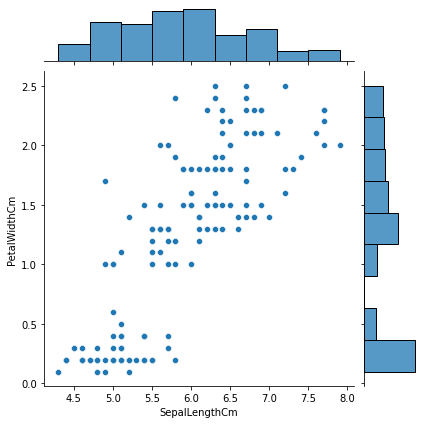

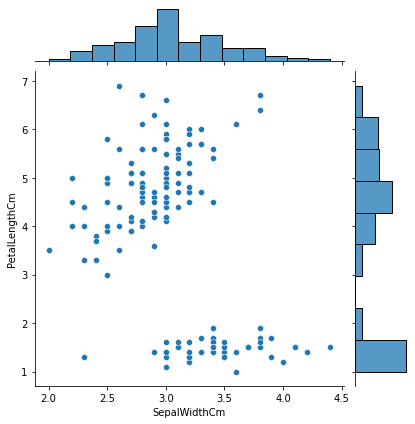

In [29]:
# Plotting the jointplot
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=data)
plt.show()

sns.jointplot(x='SepalLengthCm', y='PetalLengthCm', data=data)
plt.show()

sns.jointplot(x='SepalLengthCm', y='PetalWidthCm', data=data)
plt.show()

sns.jointplot(x='SepalWidthCm', y='PetalLengthCm', data=data)
plt.show()

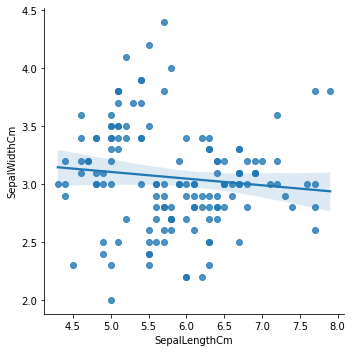

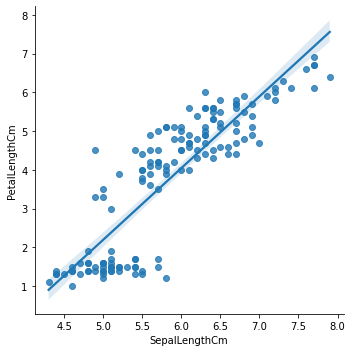

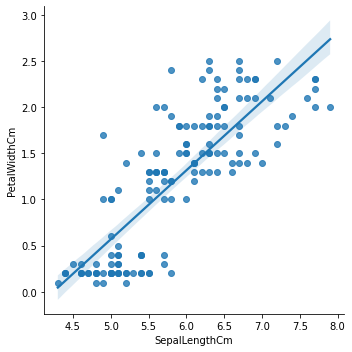

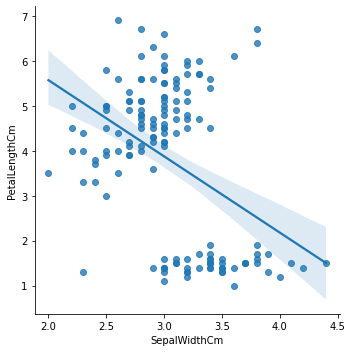

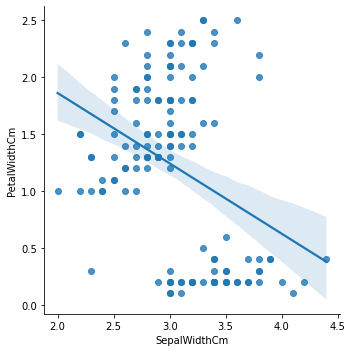

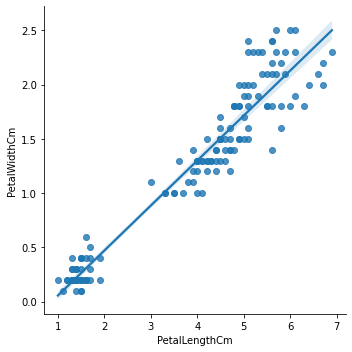

In [30]:
# Plotting the lmplot
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=data)

# Plotting the lmplot
sns.lmplot(x='SepalLengthCm', y='PetalLengthCm', data=data)

# Plotting the lmplot
sns.lmplot(x='SepalLengthCm', y='PetalWidthCm', data=data)

# Plotting the lmplot
sns.lmplot(x='SepalWidthCm', y='PetalLengthCm', data=data)

# Plotting the lmplot
sns.lmplot(x='SepalWidthCm', y='PetalWidthCm', data=data)

# Plotting the lmplot
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=data)

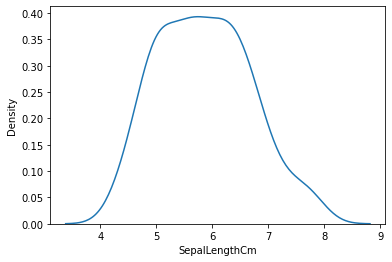

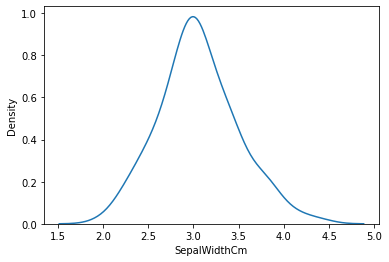

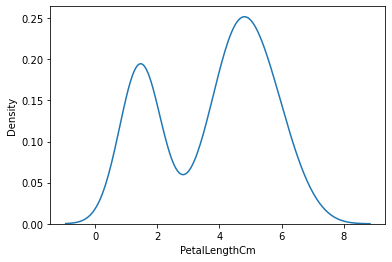

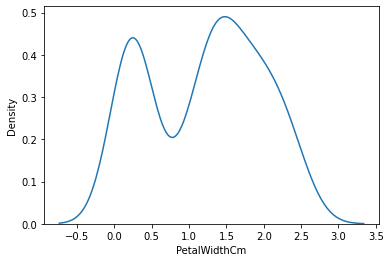

In [31]:
# Plotting the kdeplot
sns.kdeplot(data['SepalLengthCm'])
plt.show()
sns.kdeplot(data['SepalWidthCm'])
plt.show()
sns.kdeplot(data['PetalLengthCm'])
plt.show()
sns.kdeplot(data['PetalWidthCm'])
plt.show()

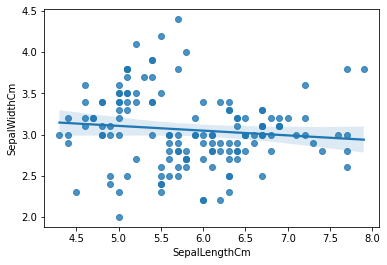

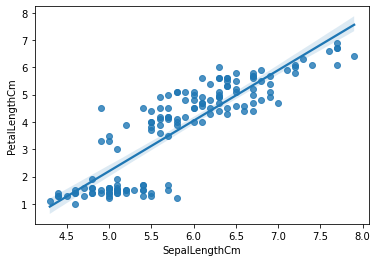

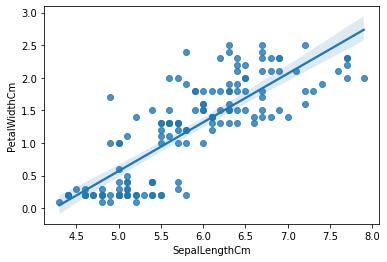

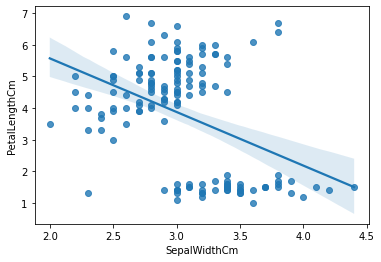

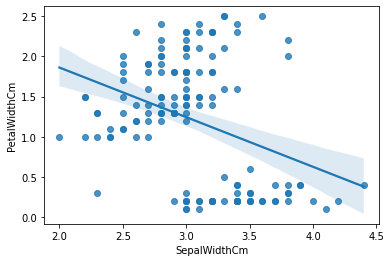

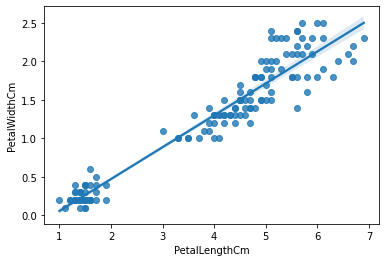

In [32]:
# Plotting the regplot
sns.regplot(x='SepalLengthCm', y='SepalWidthCm', data=data)
plt.show()

sns.regplot(x='SepalLengthCm', y='PetalLengthCm', data=data)
plt.show()

sns.regplot(x='SepalLengthCm', y='PetalWidthCm', data=data)
plt.show()

sns.regplot(x='SepalWidthCm', y='PetalLengthCm', data=data)
plt.show()

sns.regplot(x='SepalWidthCm', y='PetalWidthCm', data=data)
plt.show()

sns.regplot(x='PetalLengthCm', y='PetalWidthCm', data=data)
plt.show()

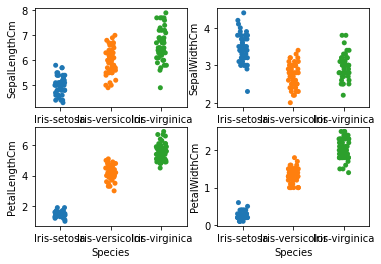

In [33]:
# Plotting the stripplot
# Create a figure with 4 subplots
fig, ax = plt.subplots(2, 2)

# Plot the first stripplot in the top left subplot
sns.stripplot(x='Species', y='SepalLengthCm', data=data, ax=ax[0, 0])

# Plot the second stripplot in the top right subplot
sns.stripplot(x='Species', y='SepalWidthCm', data=data, ax=ax[0, 1])

# Plot the third stripplot in the bottom left subplot
sns.stripplot(x='Species', y='PetalLengthCm', data=data, ax=ax[1, 0])

# Plot the fourth stripplot in the bottom right subplot
sns.stripplot(x='Species', y='PetalWidthCm', data=data, ax=ax[1, 1])

plt.show()

<a id="1"></a> <br>
# 5. Split the data into training and test sets

In [34]:
train, test = train_test_split(data, test_size = 0.3) # the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(102, 5)
(45, 5)


In [35]:
X_train= train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]   # taking the training data features
y_train=train.Species                                                              # output of our training data
X_test= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]      # taking test data features
y_test=test.Species                                                               #output value of test data

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="1"></a> <br>
# 6. Training the model

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression# Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9555555555555556


In [38]:
# Evaluate the performance of the model on the test data
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 score:", f1)

F1 score: 0.9555555555555556


## KNN (K-Nearest Neighbors)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        21
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.97      0.96      0.96        45
   weighted avg       0.96      0.96      0.95        45

[[ 9  0  0]
 [ 0 21  0]
 [ 0  2 13]]
accuracy is 0.9555555555555556


## Support Vector Machine (SVM)

In [40]:
from sklearn import svm
model = svm.SVC() #select the algorithm
model.fit(X_train, y_train) # train the algorithm with the training data and the training output
prediction=model.predict(X_test) #pass the testing data to the trained algorithm
#check the accuracy of the algorithm. 
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the SVM is: 0.9777777777777777


In [41]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Decision Tree

In [42]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.9333333333333333


In [43]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.95      0.90      0.93        21
 Iris-virginica       0.88      0.93      0.90        15

       accuracy                           0.93        45
      macro avg       0.94      0.95      0.94        45
   weighted avg       0.94      0.93      0.93        45



## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
print('Training data accuracy {:.2f}'.format(random_forest.score(X_train, y_train)*100))
print('Testing data accuracy {:.2f}'.format(random_forest.score(X_test, y_test)*100))

Training data accuracy 100.00
Testing data accuracy 95.56


## Gaussian Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.95      0.95      0.95        21
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

[[ 9  0  0]
 [ 0 20  1]
 [ 0  1 14]]
accuracy is 0.9555555555555556
